In [1]:
import numpy as np
from axon_approximation import axon_algorithm
#from axon_approximation_modified import axon_algorithm_new
import matplotlib.pyplot as plt
import pickle

plt.rc('font', size=14)
plt.rcParams.update({"text.usetex": True})

In [2]:
import nevergrad as ng

# 1D

Here we compare perfomance of greedy algorithm with random initalized for several cases:
* $x^2$
* $\sqrt{x}$
* $\exp(-x)$
* $\sin(20x)$
* solution of equation: $u(x): -\epsilon^2u''+u = 1,\, u(0)=u(1)=0,\, \epsilon = 0.1, 0.01$
* $\sqrt{x^2+y^2}$

Results for random initialization are precomputed with *train_random.py* and saved as pickle files

In [3]:
# returns OnePlusOne optimizer for given variable shape, other arguments can be specified
def get_opt_oneplus_one(n, **kwargs):
    return ng.optimizers.OnePlusOne(instrumentation=n, **kwargs)

In [3]:
xs = np.linspace(0,1, 1000)[:,None]

In [4]:
def plot_errors(data, data_rnd, title):
    plt.plot(np.arange(1,101), data, label='axon algorithm')
    plt.plot(np.arange(1,len(data_rnd)+1), data_rnd, label='random initialization')
    plt.yscale('log')
    plt.ylabel('error')
    plt.xlabel('K')
    plt.title(title)
    plt.legend()
    plt.xticks(np.arange(0,102, 10))

In [5]:
def plot_basis(data, name):
    plt.figure(figsize=(10,6))
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.ylabel(r'$\phi_{}(x)$'.format(i))
        plt.xlabel(r'$x$')
        if i == 0:
            plt.plot(np.linspace(0,1,1000), np.ones(1000)*data[0,0]) 
            # otherwise the constant function is has strange value
        else:
            plt.plot(np.linspace(0,1,1000), data[:,i])
    plt.tight_layout()

$x^2$

In [6]:
ys = (xs**2).flatten()
bs_x2, bs_coefs, r, coefs, norms, errs_x2 = axon_algorithm(xs, ys, 100)

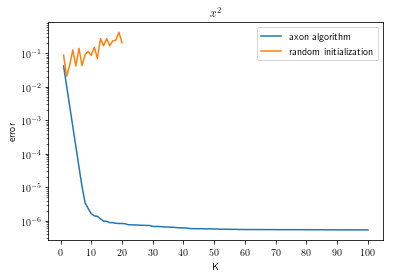

In [7]:
errs_rnd = []
with open('error_x2.pkl', 'rb') as f:
    data = pickle.load(f)
    for errs_k in data['error']:
        errors1 = [err for err in errs_k if not np.isnan(err)]
        errs_rnd.append(min(errors1))
plot_errors(errs_x2, errs_rnd, r'$x^2$')

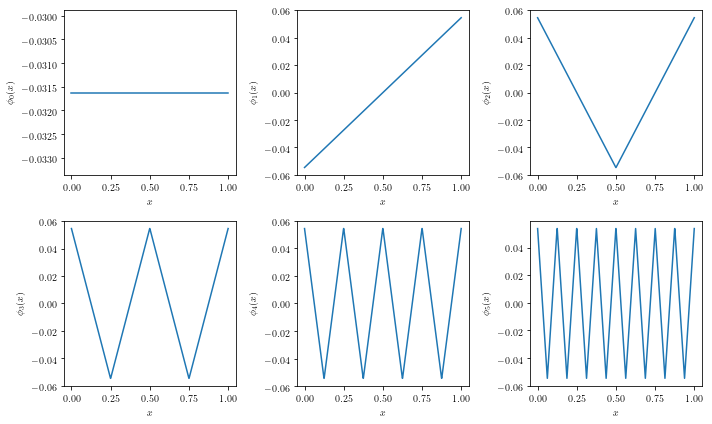

In [10]:
plot_basis(bs_x2, r'$x^2$')

$\sqrt{x}$

In [161]:
ys = (np.sqrt(xs)).flatten()
bs_sqrt, bs_coefs, r, coefs, norms, errs_sqrt = axon_algorithm(xs, ys, 100)

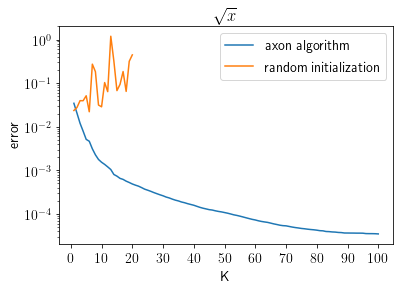

In [162]:
errs_rnd = []
with open('error_sqrt.pkl', 'rb') as f:
    data = pickle.load(f)
    for errs_k in data['error']:
        errors1 = [err for err in errs_k if not np.isnan(err)]
        errs_rnd.append(min(errors1))
plot_errors(errs_sqrt, errs_rnd, r'$\sqrt{x}$')

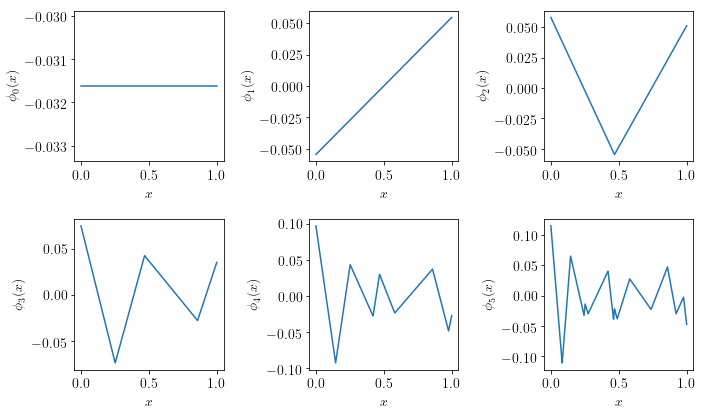

In [163]:
plot_basis(bs_sqrt, r'$\sqrt{x}$')

$\exp(-x)$

In [164]:
ys = (np.exp(-xs)).flatten()
bs_exp, bs_coefs, r, coefs, norms, errs_exp = axon_algorithm(xs, ys, 100)

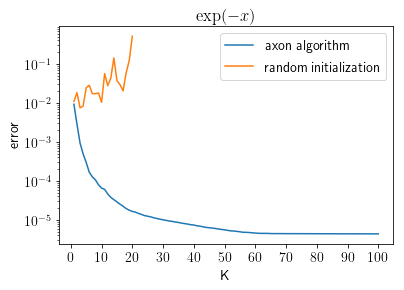

In [165]:
errs_rnd = []
with open('error_exp.pkl', 'rb') as f:
    data = pickle.load(f)
    for errs_k in data['error']:
        errors1 = [err for err in errs_k if not np.isnan(err)]
        errs_rnd.append(min(errors1))
plot_errors(errs_exp, errs_rnd, r'$\exp(-x)$')

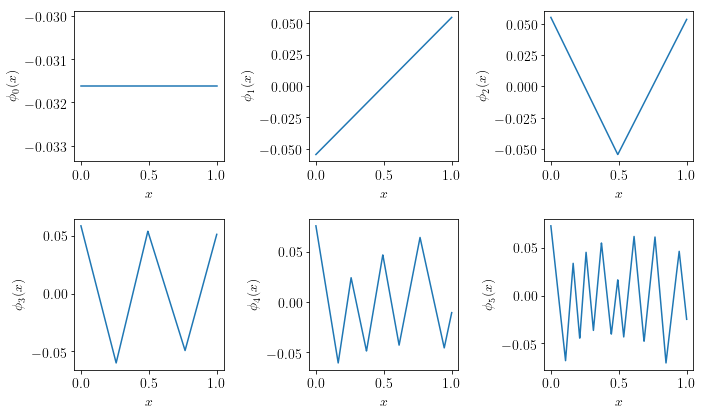

In [166]:
plot_basis(bs_exp, r'$\exp(-x)$')

$\sin(20x)$

In [167]:
ys = (np.sin(20*xs)).flatten()
bs_sin, bs_coefs, r, coefs, norms, errs_sin = axon_algorithm(xs, ys, 100)

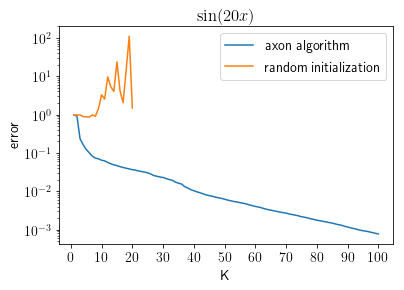

In [168]:
errs_rnd = []
with open('error_sin.pkl', 'rb') as f:
    data = pickle.load(f)
    for errs_k in data['error']:
        errors1 = [err for err in errs_k if not np.isnan(err)]
        errs_rnd.append(min(errors1))
plot_errors(errs_sin, errs_rnd, r'$\sin(20x)$')

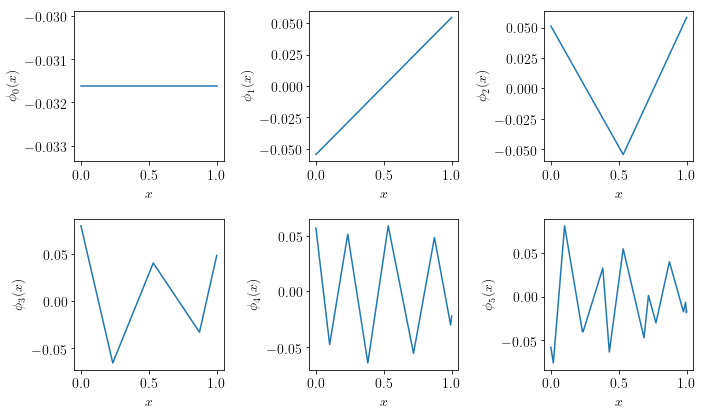

In [169]:
plot_basis(bs_sin, r'$\sin(20x)$')

$u(x): -\epsilon^2u''+u = 1, u(0)=u(1)=0$

In [12]:
# we found solution analytically
def u(x, eps=0.05):
    a = (1-np.exp(1/eps))/(np.exp(2/eps)-1)
    b = (np.exp(1/eps)-np.exp(2/eps))/(np.exp(2/eps)-1)
    return a*np.exp(x/eps)+b*np.exp(-x/eps) + 1

In [171]:
eps = 0.01
ys = u(xs, eps)
bs_001, bs_coefs, r, coefs, norms, errs_001 = axon_algorithm(xs, ys, 100)

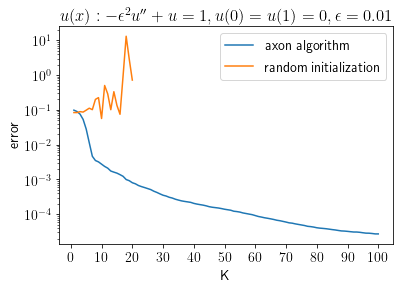

In [172]:
errs_rnd = []
with open('error_diff.pkl', 'rb') as f:
    data = pickle.load(f)
    for errs_k in data['error'][eps]:
        errors1 = [err for err in errs_k if not np.isnan(err)]
        errs_rnd.append(min(errors1))
plot_errors(errs_001, errs_rnd, r"$u(x): -\epsilon^2u''+u = 1, u(0)=u(1)=0, \epsilon={}$".format(eps))

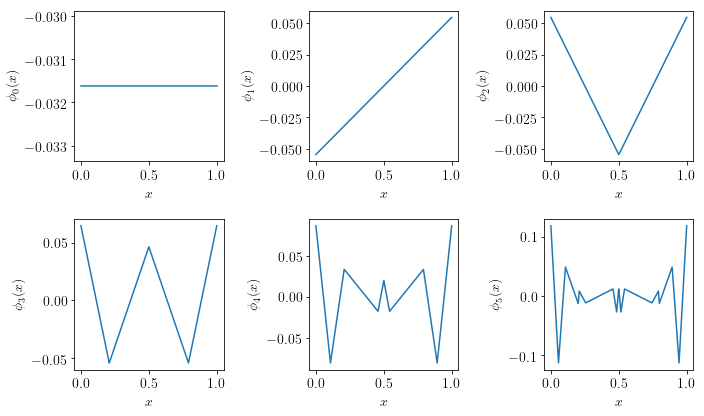

In [173]:
plot_basis(bs_001, r"$u(x): -\epsilon^2u''+u = 1, u(0)=u(1)=0, \epsilon={}$".format(eps))

In [13]:
eps = 0.1
ys = u(xs, eps)
bs_01, bs_coefs, r, coefs, norms, errs_01 = axon_algorithm(xs, ys, 100)

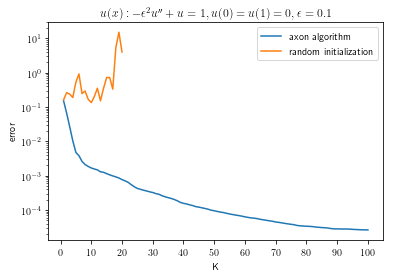

In [14]:
errs_rnd = []
with open('error_diff.pkl', 'rb') as f:
    data = pickle.load(f)
    for errs_k in data['error'][eps]:
        errors1 = [err for err in errs_k if not np.isnan(err)]
        errs_rnd.append(min(errors1))
plot_errors(errs_01, errs_rnd, r"$u(x): -\epsilon^2u''+u = 1, u(0)=u(1)=0, \epsilon={}$".format(eps))

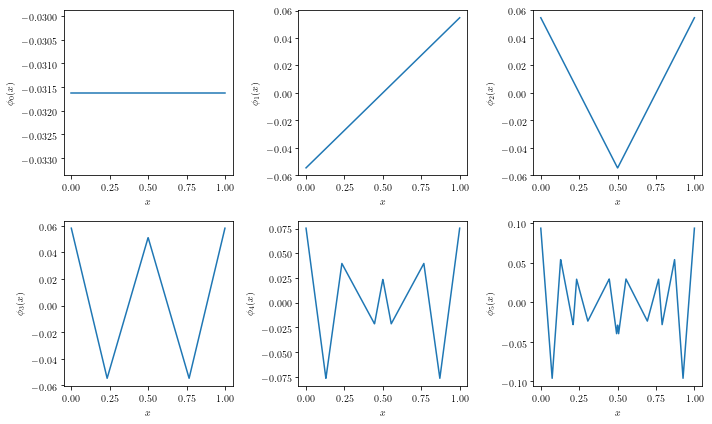

In [15]:
plot_basis(bs_01, r"$u(x): -\epsilon^2u''+u = 1, u(0)=u(1)=0, \epsilon={}$".format(eps))

# 2D

$\sqrt{x^2+y^2}$

In [177]:
def f(x):
    return np.sqrt(xs[:,0]**2+xs[:,1]**2).astype(np.float64)

In [178]:
x = np.linspace(-1,1,100)
xx, yy = np.meshgrid(x,x)
xs = np.hstack([xx.flatten()[:,np.newaxis], yy.flatten()[:,np.newaxis]])
ys = f(xs)
bs_2d, bs_coefs, r, coefs, norms, errs_2d = axon_algorithm(xs, ys, 100)

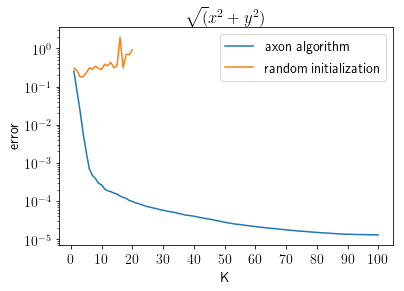

In [179]:
errs_rnd = []
with open('error_2d.pkl', 'rb') as f:
    data = pickle.load(f)
    for errs_k in data['error']:
        errors1 = [err for err in errs_k if not np.isnan(err)]
        errs_rnd.append(min(errors1))
plot_errors(errs_2d, errs_rnd, r'$\sqrt(x^2+y^2)$')

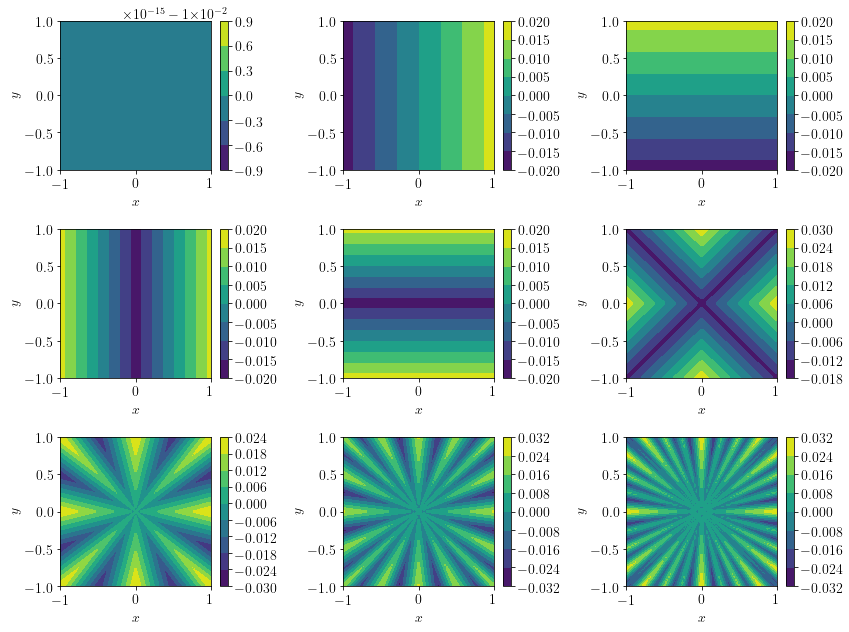

In [180]:
plt.figure(figsize=(12,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    #plt.title(r'$\phi_{}$'.format(i+5))
    plt.ylabel(r'$y$'.format(i))
    plt.xlabel(r'$x$')
    plt.contourf(xx, yy, bs_2d[:,i].reshape(100,100, order='C'))
    plt.colorbar()
plt.tight_layout()